In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io as sio

In [40]:
#cont = scipy.io.loadmat(os.path.join('..','DATA','allFaces.mat'))
cont = sio.loadmat('allfaces.mat')
fcs = cont['faces']
m = int(cont['m'])
n = int(cont['n'])
nfcs = np.ndarray.flatten(cont['nfaces'])

In [41]:
U, S, VT = np.linalg.svd(fcs[:,:25],full_matrices=False)  #Economy SVD

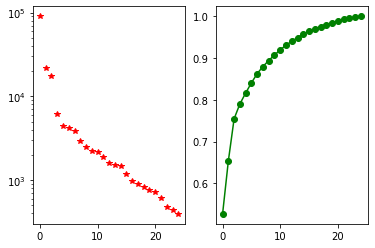

In [44]:
figure1 = plt.figure()
axis1 = figure1.add_subplot(121)
axis1.semilogy(S,'*',color='r')    
axis2 = figure1.add_subplot(122)
axis2.plot(np.cumsum(S)/np.sum(S),'-o',color='g')

In [45]:
snap=fcs[:,:25].T @ fcs[:,:25]
s_snap, v_snap = np.linalg.eig(snap)
S_snap= np.sqrt(abs(s_snap))

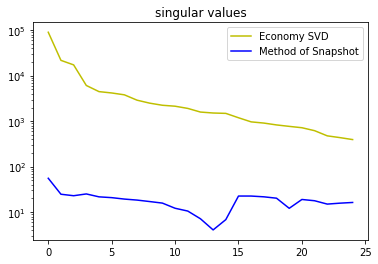

In [46]:
plt.plot(S,color='y', label='Economy SVD')
plt.plot(S_snap, color='b', label='Method of Snapshot')
plt.yscale('log')
plt.show
plt.legend()

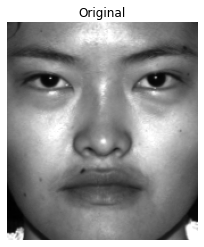

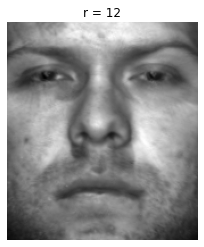

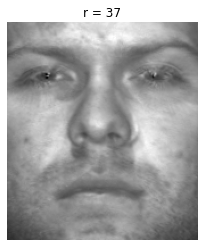

In [49]:
test_fc = fcs[:,np.sum(nfcs[:25])] 
plt.imshow(np.reshape(test_fc,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original')
plt.axis('off')
plt.show()

r_list = [12, 37]

for r in r_list:
    recon_fc = U[:,:r]  @ U[:,:r].T @ test_fc
    img = plt.imshow(np.reshape(recon_fc,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

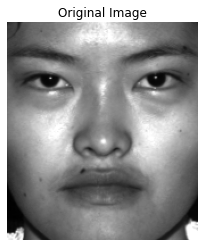

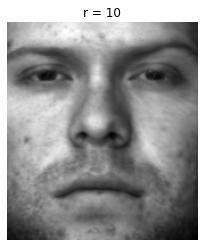

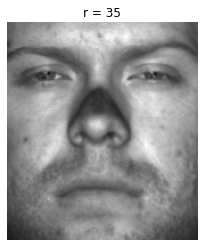

In [50]:
U_snap=fcs[:,:25] @ v_snap @ np.linalg.inv(np.diag(S_snap))

plt.imshow(np.reshape(test_fc,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

r_list = [10, 35]

for r in r_list:
    recon_fc2 = U_snap[:,:r]  @ U_snap[:,:r].T @ test_fc
    img = plt.imshow(np.reshape(recon_fc2,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()